# Visual Data Analysis using ALTAIR

## Problem statement

1. The city of Mistford and the Boonsong Lekagul Wildlife Preserve are facing a significant decline in the nesting pairs of the Rose-Crested Blue Pipit, a beloved local bird species. Previous investigations have suggested a potential link between the decline and activities at Kasios Office Furniture, a manufacturing firm in Mistford. However, no concrete evidence has been found to establish this link. 
2. To address this issue, we need to analyze several years of water sensor readings from rivers and streams in the preserve to identify any potential correlations or patterns between chemical measurements and the decline in bird population.

## Audience details

1. City Officials: City officials from Mistford who are responsible for environmental conservation and wildlife protection.
2. Environmental Agencies: Representatives from environmental agencies tasked with monitoring and regulating pollution levels in the area.
3. Manufacturing Companies: Representatives from manufacturing companies operating in Mistford, including Kasios Office Furniture, who may be implicated in the investigation.
4. Wildlife Conservationists: Experts and researchers focused on preserving the biodiversity of the Boonsong Lekagul Wildlife Preserve and mitigating threats to endangered species.

## Installing packages and importing libraries

In [1]:
#Installing packages
!pip install "altair[all]"
!pip install altair vega_datasets
!pip install "vegafusion[embed]>=1.4.0" 
!pip install altair_viewer
!pip install vegafusion-jupyter
!pip install -U altair_viewer
!pip install Pillow
!pip install vegafusion
!pip install "vegafusion[embed]"

In [25]:
# Importing libraries
# General
import altair as alt
import pandas as pd

# For dealing with large datasets
#alt.data_transformers.enable('default')
#alt.data_transformers.enable("vegafusion")
alt.data_transformers.disable_max_rows()
alt.data_transformers.enable('default', max_rows=None)

# For interactivity
import vegafusion as vf
vf.enable_widget()

#For reading image
from PIL import Image


## Loading datasets

In [26]:
#Dataset for chemical readings
df=pd.read_csv("Boonsong Lekagul waterways readings.csv")
df.head()

,id,value,location,sample date,measure
0,2221,2.00,Boonsri,11-Jan-98,Water temperature
1,2223,9.10,Boonsri,11-Jan-98,Dissolved oxygen
2,2227,0.33,Boonsri,11-Jan-98,Ammonium
3,2228,0.01,Boonsri,11-Jan-98,Nitrites
4,2229,1.47,Boonsri,11-Jan-98,Nitrates


###### Reference image for marking the cordinates and routes 

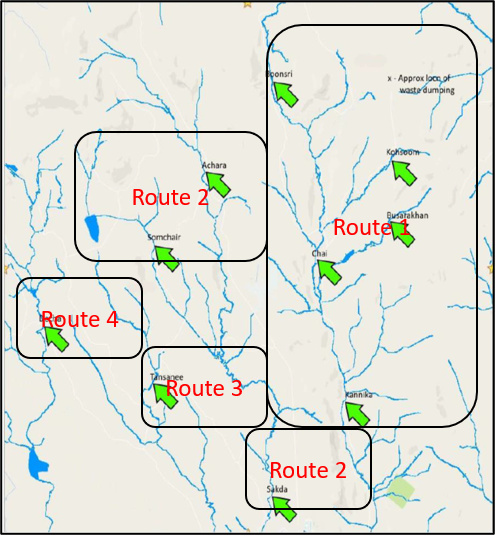

In [27]:
map_image_path = "Site_img.png"
img_sites = Image.open(map_image_path)
img_sites

In [28]:
#Dataset for distance readings
df_sites=pd.read_csv("location_coordinates.csv")
df_sites.head(15)

,Route,location,X,Y,Distance from dumping site
0,Route 1,Kohsoom,8.2,7.0,1.55
1,Route 1,Boonsri,6.0,8.2,1.82
2,Route 1,Busarakhan,8.0,6.0,2.51
3,Route 1,Chai,7.0,5.0,3.59
4,Route 2,Achara,4.2,7.0,3.90
5,Route 2,Somchair,3.0,5.8,5.51
6,Route 1,Kannika,7.0,2.5,6.05
7,Route 3,Tansanee,3.2,2.5,7.56
8,Route 2,Sakda,5.6,0.5,8.30
9,Route 4,Decha,1.0,3.9,8.21


# Data Visualization - Task 1 
## Checking for missing data, change in collection frequency, and unrealistic values

###### Checking the structure of the datasets

In [29]:
print("Dimensions of the data set for chemical readings are:  ",df.shape)
print("Dimensions of the data set for sites are:  ",df_sites.shape)

Dimensions of the data set for chemical readings are:   (136824, 5)
Dimensions of the data set for sites are:   (11, 5)


###### Checking the datatypes

In [30]:
#Datatypes of data set for chemical readings
df.dtypes

id               int64
value          float64
location        object
sample date     object
measure         object
dtype: object

In [31]:
#Datatypes of data set sites
df_sites.dtypes

Route                          object
location                       object
X                             float64
Y                             float64
Distance from dumping site    float64
dtype: object

###### Changing the datatypes

In [32]:
#Converting sample date to date type format and checking the data types
df['sample date']=pd.to_datetime(df['sample date'])
df.dtypes

C:\Users\Itisha Sharma\AppData\Local\Temp\ipykernel_7080\3464027667.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['sample date']=pd.to_datetime(df['sample date'])


id                      int64
value                 float64
location               object
sample date    datetime64[ns]
measure                object
dtype: object

In [33]:
#Converting Y column to float data type
df_sites['Y']=pd.to_numeric(df_sites['Y'], errors='coerce')
df_sites.dtypes

Route                          object
location                       object
X                             float64
Y                             float64
Distance from dumping site    float64
dtype: object

###### Checking the null values - Both graphically and using pandas

In [34]:
#Checking for null values for data set for chemical readings
df.isnull().sum()

id             0
value          0
location       0
sample date    0
measure        0
dtype: int64

In [35]:
#Checking for null values for data set for sites
df_sites.isnull().sum()

Route                         0
location                      0
X                             0
Y                             0
Distance from dumping site    0
dtype: int64

We observe that there are no missing values in both the datasets.

## Visualization 1 :

In [36]:
# Cheking for missing values and outliers location wise on the basis of years for data set for chemical readings using a bar chart
chart_missing_years_location = alt.Chart(df).mark_bar().encode(
    alt.X('year(sample date):O', title='Year'),
    alt.Y('location', title='Location'),
    alt.Color('average(value)', 
              scale=alt.Scale(range=['green', 'blue', 'red']),  #Using range of colors to distinguish mark the sites into
                                                                # high average value of chemicals (red), 
                                                                # mediocre level of chemicals (blue to purple),
                                                                # low level of chemicals (green)
              title=('Average of measure value'),# Changing title of the legend
             ).legend(orient="left"),#adjusting the legend to the left side
    tooltip=['average(value)'] # Adding tool tip for extra information
                                            # Rounding off the value to 2 decimals
).properties( #adjusting the chart size
    width=600,
    height=300
)
chart_missing_years_location

VegaFusionWidget(spec='{\n  "config": {\n    "view": {\n      "continuousWidth": 300,\n      "continuousHeight…

#### General :

* **Aim of the visualization :** To discover and identify the missing values, outliers, or change in collection frequency location wise. The target was understanding trends and outliers in the entire dataset.

* **Findings:** Both pattern and anomaly

    1. Data points for all sites of Route 1 (Boonsri, Kohsoom, Busarakhan, Chai, Kannika) were available from 1998 to 2016 (i.e. for all 19 years)
    2. Data points for only 2 sites on Route 2 (Somchair, Sakda) were available from 1998 to 2016
    3. Data points for all other sites – Route 2 (Achara), Tansanee (Route 3), and Decha (Route 4) were available from 2009 to 2016 (i.e. for 8 years)
    4. Kohsoom has shown highest average of measures in 2003. Kohsoom is the nearest site to the dumping site.
    5. Majority of the sites fall in the green to blue zones. 
    6. The year 2003 was observed the average value of measures from mediocre to high levels. It could be because of heat wave which hit UK in this year.
    7. Tansanee (Route 3) has always been in the blue to purple zone (mediocre levels of chemicals).
    8. Except in the year 2009, Achara (Route 2) has been always been in green zone (low levels of chemicals).
    
* **How the finding can be seen from the visualization:**
    - Mark: Bar
    - Channels:
        * Color and hue: For intensity of the average value of measures
        * Position: To identify the location and year
        * Tooltip: To share information on the average value
    - The presence of marks across every location show that the data for a particular year and location were collected.
    - The channel color and hue depict that intensity of the average value of chemicals present in that particular site. For e.g. for the year 2003 and site Kohsoom, the bar is bright red depicting that the average value of the chemicals is the highest.
    
* **How the visualisation design support the analysis, i.e. what the data and analysis task are and how the visualisation is designed to match and support them.** 
    - The visualization design matches the analysis task by providing a clear representation of the dataset's spatial and temporal dimensions. It enables stakeholders to quickly identify trends and outliers in chemical measurements across different sites, aiding in the identification of potential correlations with the decline in bird populations.
    
* **Any advanced Altair visualisation features used, such as multi-layer, chart concatenation, and interaction.**
    - Size of the chart was customized to make it readable
    - Tooltip was added to show extra information on average value
    - The title of the legend was changed
    - The orientation of the legend was changed to left.
    - Legend was made in the form of a scale and color range was explicitly mentioned



### Effectiveness of the visual


* **Why is the chart type most appropriate for the analysis?**
    - A heatmap is most suitable for analysis since it effectively uses color intensity to describe data values while displaying huge datasets in a grid format. It is possible to quickly spot trends, missing values, correlations, and patterns in the data using this visualization technique.

* **Why is the choice of mark and channel the most effective?** 
    - Using color and hue alongside the heatmap effectively communicates data intensity, while positioning arranges it according to location and year. Tooltips further enrich this by offering detailed insights when needed, thus making this method efficient for swiftly recognizing patterns and comparing data across various dimensions.
 
* **Is there any additional feature, such as sorting/filtering, dashboard or interactions, is used to improve the visualisation?**
    - Tooltips were added for interactivity.

## Visualization 2:

In [37]:
#Checking for missing values and outliers for measures the basis of location for data set for chemical readings
chart_missing_location_measure= alt.Chart(df).mark_bar().encode(
    alt.X(field='measure'),
    alt.Y(field='location'),
    alt.Color('average(value)', 
              scale=alt.Scale(range=['green', 'blue', 'red']),  #Using range of colors to distinguish mark the sites into
                                                                # high average value of chemicals (red), 
                                                                # mediocre level of chemicals (blue to purple),
                                                                # low level of chemicals (green)
              title=('Average of measure value'),# Changing title of the legend
             ).legend(orient="left"),#adjusting the legend to the left side
    tooltip=['average(value)']
)

chart_missing_location_measure

VegaFusionWidget(spec='{\n  "config": {\n    "view": {\n      "continuousWidth": 300,\n      "continuousHeight…

#### General

* **Aim of the visualization:** The objective was to detect missing values, outliers, or alterations in the frequency of data collection based on metrics of the chemicals. The aim was to comprehend trends and anomalies present within the complete dataset.

* **Findings:** Both anomaly and pattern
    - The average value of all locations for every measure falls in the green zone.
    - The average value of 'Total coliforms' was in red zone for Achara.
    - There are missing values as we can see from the white spaces. The readings for location for a particular measure was not done even once in the span of 19 years of observations.

* **How the finding can be seen from the visualization:** 
    - Mark: Bar
    - Channels:
        * Color and hue: For intensity of the average value of measures
        * Position: To identify the location and chemicals
        * Tooltip: To share information on the average value
    - The existence of marks in each location indicates that data for a specific year and place were gathered.
    - The color and hue of the channel illustrate the average intensity of chemicals found at that specific location.. For e.g. for the site Achara, the cell is bright red depicting that the average value of the Total Coliforms is the highest. 
    
* **How the visualisation design support the analysis, i.e. what the data and analysis task are and how the visualisation is designed to match and support them.** 
    - The visualization used matches the task at hand  by presenting a clear image of the locations and time periods that the dataset covers .It enables us to quickly spot patterns and unusual things in chemical measurements at different places, which might be linked to the drop in bird numbers.

* **Any advanced Altair visualisation features used, such as multi-layer, chart concatenation, and interaction.** 
    - The chart's dimensions were adjusted to ensure readability
    - A tooltip was incorporated to display additional details about the average value.
    - The legend's title was modified..
    - The legend's position was shifted to the left.
    - The legend was created as a scale, explicitly indicating the range of colors.

    
### Effectiveness of the visual
	
* **Why is the chart type most appropriate for the analysis?** 
    - A heatmap is appropriate because it efficiently employs color intensity to represent data values while presenting large datasets in a grid layout. This visualization method enables the swift identification of missing values, trends, correlations, and patterns within the data.

* **Why are the choice of mark and channel the most effective?** 
    - Color and hue on the heatmap show how intense the data is, while its position tells us where and when it happened. Tooltips give extra details when you need them, making it easy to see patterns and compare data in different ways.

* **Is there any additional feature, such as sorting/filtering, dashboard or interactions, is used to improve the visualisation?**
    - Tooltip was added for viewing the values of the chemicals across locations.

## Visualization 3 :

In [38]:
# Checking for missing values and outleirs for measures on the basis of years for data set for chemical readings

chart_missing_years_measure = alt.Chart(df).mark_point(size=150, filled=True).encode(
    alt.X('measure:N', title='Measure',sort='ascending'),
    alt.Y('year(sample date):O', title='Year'),
    alt.Color('average(value)', 
              scale=alt.Scale(range=['green', 'blue', 'red']),  
              title='Average of measure value'
             )
).configure_axis(
    grid=True
)
chart_missing_years_measure

VegaFusionWidget(spec='{\n  "config": {\n    "view": {\n      "continuousWidth": 300,\n      "continuousHeight…

#### General

* **Aim of the visualization:** To uncover and detect missing values, outliers, or shifts in data collection frequency related to measures. The aim was to grasp trends and anomalies across the entire dataset.

* **Findings:** Both pattern and anomaly
    -There is inconsistency in the frequency of data collection e.g. Berilium,PCB 28, PCB 118, PAHs, Boron, Cesium , PCB 52, Trifluralin, Fluorene   were collected only once from 1998 to 2016. 
    - Total dissolved salts and bicarbonates have always been in the blue zone i.e. mediocre average value.
    - Average value of iron was in red zone in 2003.

* **How the finding can be seen from the visualization:** 
    - Mark: Point
    - Channels:
        * Color and hue: Represent the intensity of the average value of measures
        * Position: Used to identify the measure name and year
    - Marks are present for every measure, indicating data collection for a specific year and chemical.
    - Color and hue show the intensity of average chemical values; for instance, in 2003, Iron had a high average value, depicted in red.

* **How the visualisation design support the analysis, i.e. what the data and analysis task are and how the visualisation is designed to match and support them.** 
    - The visualization design facilitates intuitive comparison of chemical measurements over time. It uses color and position to convey intensity and identify trends or outliers. Marks for each measure and year ensure comprehensive data coverage.

* **Any advanced Altair visualisation features used, such as multi-layer, chart concatenation, and interaction.** 
    - Marker was filled with appropriate color
    - Grid was made for better location of the points
    - The x-axis was sorted in ascending order to easily locate the measure name
    - Legend was made in the form of a scale and color range was explicitly mentioned


### Effectiveness of the visual

* **Why is the chart type most appropriate for the analysis?** 
    - The aim was to plot measures against year (two categorical variables ) and color the circle on the basis of average value of the measure (quantitative). Therefore the best choice was a dot plot.

* **Why are the choice of mark and channel the most effective?** 
    - The choice of a point mark and channels such as color and position is effective because it allows for clear visualization of individual data points while conveying key information about the intensity of average values and their distribution over time. This combination facilitates easy identification of trends and outliers in the dataset.

* **Is there any additional feature, such as sorting/filtering, dashboard or interactions, is used to improve the visualisation?**
    - Sorting of the measure names was done in ascending order.
    - Grid lines were made for easy location of dots.

## Visualization 4 :

In [39]:
# For checking the collection frequency across cities 
base_bar_location= alt.Chart(df).encode(
  alt.Y('count(measure)'),
    alt.X('location', sort='-y'),
    text='count(measure)'
    
).properties(
width=500,
    height=500
)
chart1=base_bar_location.mark_bar() + base_bar_location.mark_text(align='left', dx=-10, dy=-10)
chart1

VegaFusionWidget(spec='{\n  "config": {\n    "view": {\n      "continuousWidth": 300,\n      "continuousHeight…

In [40]:
# For checking the collection frequency across measures
base_bar_measures= alt.Chart(df).encode(
  alt.Y('count(measure)'),
    alt.X('measure', sort='-y'),
    text='count(measure)'
    
)
chart2=base_bar_measures.mark_bar() + base_bar_measures.mark_text(align='left', angle=270, dx=10)
chart2

VegaFusionWidget(spec='{\n  "config": {\n    "view": {\n      "continuousWidth": 300,\n      "continuousHeight…

In [41]:
#Vertically concatenating chart1 and chart 2
concatenated_chart = chart1 & chart2
concatenated_chart

VegaFusionWidget(spec='{\n  "config": {\n    "view": {\n      "continuousWidth": 300,\n      "continuousHeight…

#### General

* **Aim of the visualization:** To discover and compare the frequencies of collection across locations, and measures. The target was attributes of location and measures and we wanted to find the location and measures with maximum number of counts of observations.

* **Findings:** 
    - Boonsri and Chai had maximum number of observations done for measures with values 31314 and 31245 respectively.
    - Achara, Decha and Tansanee have the lowest number of observations.
    - Water temperature was recorded maximum number of times across years and across locations with 5031 records. 

* **How the finding can be seen from the visualization:** 
    - Mark: Bar, Text
    - Channels:
        * Position: Used to identify the counts of records across locations and measures.

* **How the visualisation design support the analysis, i.e. what the data and analysis task are and how the visualisation is designed to match and support them.** 
    - The visualization design effectively supports the analysis task by providing a clear representation of the frequencies of data collection across locations and measures. It allows for easy comparison and identification of the locations and measures with the highest number of observations, thereby facilitating data-driven insights and decision-making.

* **Any advanced Altair visualisation features used, such as multi-layer, chart concatenation, and interaction.** 
    - The graph was sorted on the basis of count of measures
    - Chart layering was done (bar graph+ text)
    - The text was aligned at the centre and x and y offsets were set
    - Vertical concatenation of graphs (for location and measures’s count) was done


### Effectiveness of the visual

* **Why is the chart type most appropriate for the analysis?** 
    - Bar chart is efficient for comparison as we aimed to compare the counts of measures location and measure wise.
    - We have location (or measures) and counts of observations which are qualitative and quantitative respectively
	
* **Why are the choice of mark and channel the most effective?** 
    - Bar & Text: for easy comparisons and visually easy for the viewers to perceive and compare the values.
    - Position: Position encoding along the y-axis accurately represents the quantitative aspect of the data

* **Is there any additional feature, such as sorting/filtering, dashboard or interactions, is used to improve the visualisation?**
    - The graph was arranged according to the number of measurements.
    - Layering of the chart was performed (combining bar graph with text).
    - The text was centered and adjustments were made to its position along the x and y axes.
    - The graphs for location and measure count were stacked vertically.



## Visualization 5 :

In [42]:
# For checking the collection frequency across years 
base_count_years= alt.Chart(df).encode(
  alt.Y('count(measure)'),
    alt.X('year(sample date):O'),
    text='count(measure)'
    
).properties(
width=700
)

base_count_years.mark_line() + base_count_years.mark_text(align='left', dx=-10, dy=-10)

VegaFusionWidget(spec='{\n  "config": {\n    "view": {\n      "continuousWidth": 300,\n      "continuousHeight…

#### General

* **Aim of the visualization:** The aim was to see the trend of collection frequency over the span of 19 years.

* **Findings:** 
    1. From 1998 to 2007, the trend of collection frequency was increasing. 
    2. The collection frequency is highest in the year 2007 with 11338 records.

* **How the finding can be seen from the visualization:** 
    - Mark: Line, Text
    - Channels: 
      * Position: Collection frequency for a particular year
      * Slope: Increase or decrease in the collection frequency.

* **How the visualisation design support the analysis, i.e. what the data and analysis task are and how the visualisation is designed to match and support them.** 
    - The visualization's line chart effectively displays the trend of collection frequency over 19 years, with text annotations highlighting key findings like the peak in 2007. By employing position and slope channels, it enables easy interpretation of temporal patterns, supporting the analysis of data trends.

* **Any advanced Altair visualisation features used, such as multi-layer, chart concatenation, and interaction.** 
    - Layering of the line and text markers was done

### Effectiveness of the visual

* **Why is the chart type most appropriate for the analysis?** 
    - The aim was to understand the changes over time of collection frequency for which line chart is the most appropriate. 

* **Why are the choice of mark and channel the most effective?** 
    - The selection of line marks enables clear visualization of temporal trends, while text annotations highlight key findings succinctly. 
    - Position and slope channels facilitate intuitive interpretation by representing collection frequency over time and indicating the direction and magnitude of changes, respectively, resulting in an effective portrayal of the dataset's temporal dynamics.

* **Is there any additional feature, such as sorting/filtering, dashboard or interactions, is used to improve the visualisation?**
    - Layering of the line and text markers was done.

# Data Visualization - Task 2

To maintain and avoid any inconsistency in the data and ensure that the analysis is efficient, we considered the sites and chemicals for which observations are present from 1998 to 2016. 
Following the observations from Task 1, for deeper analysis we consider:
1. Sites: Route 1 (Boonsri, Kohsoom, Busarakhan, Chai, Kannika) and Route 2 (Somchair, Sakda) were available from 1998 to 2016 as the data is available from 1998 to 2016.
2. Chemicals which were observed for all the locations from 1998 to 2016 are'Ammonium', 'Biochemical Oxygen', 'Cadmium', 'Calcium', 'Chemical Oxygen Demand (Cr)', 'Chemical Oxygen Demand (Mn)', 'Chlorides', 'Chromium', 'Copper', 'Dissolved oxygen',  'Lead', 'Magnesium', 'Nitrates', 'Nitrites', 'Orthophosphate-phosphorus', 'Potassium', 'Sodium', 'Sulphates', 'Total phosphorus', 'Water temperature'.


In [43]:
# Customizing the dataset
# List of locations and measures
locations = ['Boonsri', 'Kohsoom', 'Busarakhan', 'Chai', 'Kannika', 'Somchair', 'Sakda']
measures = ['Ammonium', 'Biochemical Oxygen', 'Cadmium', 'Calcium', 'Chemical Oxygen Demand (Cr)', 'Chemical Oxygen Demand (Mn)', 
            'Chlorides', 'Chromium', 'Copper', 'Dissolved oxygen',  'Lead', 'Magnesium', 'Nitrates', 'Nitrites', 
            'Orthophosphate-phosphorus', 'Potassium', 'Sodium', 'Sulphates', 'Total phosphorus', 'Water temperature']

# Filter the main DataFrame
df_filtered = df[df['location'].isin(locations) & df['measure'].isin(measures)]

df_filtered.head()

,id,value,location,sample date,measure
0,2221,2.00,Boonsri,1998-01-11,Water temperature
1,2223,9.10,Boonsri,1998-01-11,Dissolved oxygen
2,2227,0.33,Boonsri,1998-01-11,Ammonium
3,2228,0.01,Boonsri,1998-01-11,Nitrites
4,2229,1.47,Boonsri,1998-01-11,Nitrates


In [44]:
df_filtered.dtypes

id                      int64
value                 float64
location               object
sample date    datetime64[ns]
measure                object
dtype: object

## Visualization 6 :

In [45]:
measure_labels = ["All"] + measures
measure_dropdown = alt.binding_select(options=measure_labels, name="Choose the Measures")
measure_select = alt.selection_point(fields=['measure'], bind=measure_dropdown)

base_chart=alt.Chart(df_filtered).mark_line(point=True).encode(
    column='location', #Making a faceted chart
    x='year(sample date)',
    y='average(value)'
).add_params(
    measure_select
).transform_filter(
    measure_select
)

base_chart

VegaFusionWidget(spec='{\n  "config": {\n    "view": {\n      "continuousWidth": 300,\n      "continuousHeight…

#### General

* **Aim of the visualization:** The aim of the visualization is to show the average values of different measures over time at different locations. The faceted line charts display data that is filtered by the user by choosing a specific measure from a dropdown menu. Each faceted line chart represents a different location.

* **Findings:**
    - Across all locations, it has been noted that the average value of measures has exhibited a declining trend over a 19-year period, although the start was at high levels.

* **How the finding can be seen from the visualization:** 
    - Mark: Line, Point
    - Channels: 
      * Position: To identify the average value of measures year-wise for each location
      * Slope: To show if the value is increasing or decreasing.

* **How the visualisation design support the analysis, i.e. what the data and analysis task are and how the visualisation is designed to match and support them.**
    - This visualization design supports the task by making it simple to compare trends or outliers between locations by enabling comparison across several geographic or categorical areas. The chart becomes more versatile and focuses on user-defined interests when measures are chosen interactively through a dropdown menu. For displaying the evolution of values over time, which is an essential feature of many time-series data analysis, the line chart format works well.

* **Any advanced Altair visualisation features used, such as multi-layer, chart concatenation, and interaction.** 
    - Making faceted chart with columns as locations
    - Creating a dropdown filter on measures
    - Changing the layout of the chart based on filter

### Effectiveness of the visual

* **Why is the chart type most appropriate for the analysis?**
    - When illustrating changes over time, line charts work well because they make it simple to identify patterns, growth, or declines. The faceted structure makes it possible to compare directly between different locations.

* **Why are the choice of mark and channel the most effective?**
    - The use of lines and points together makes it easier to calculate the exact value of each measure annually and to connect the points to create a visually appealing trend visualization. The location-based faceting and interactive selection methods offer a well-defined and focused structure for analysis.

* **Is there any additional feature, such as sorting/filtering, dashboard or interactions, is used to improve the visualisation?**
    - The measure selection interactive dropdown menu gives users more choice over what they see, which improves the visualization. More in-depth interaction with the data and more personalized insights may result from this interaction.

## Visualization 7 :

In [46]:
#In this visualization as it can be seen that it shows the amount of all chemicals based on years from 1998 to 2016. 
# Grouping the DataFrame by 'measure' and the time period (e.g., 'year') and aggregating the 'value' column
total_values1 = df_filtered.groupby(['measure', df_filtered['sample date'].dt.year])['value'].sum().reset_index()

# Creating the Altair bar chart with tooltips
bar_chart = alt.Chart(total_values1).mark_bar().encode(
    x=alt.X('sample date:O', axis=alt.Axis(title='Year')),  # Updated x-axis field
    y=alt.Y('average(value):Q', axis=alt.Axis(title='Average Value')),  # Updated y-axis field
    color='measure:N',
    tooltip=['measure', 'sample date', 'average(value)']  # Specify tooltip encoding here
).properties(
    title='Average Value by Chemical Measure over Time',
    width=800,
    height=400
)

from IPython.display import display
display(bar_chart)

VegaFusionWidget(spec='{\n  "config": {\n    "view": {\n      "continuousWidth": 300,\n      "continuousHeight…

#### General

* **Aim of the visualization:** The visualization aims to show the cumulative value of different chemicals over a given period of time, from 1998 to 2016. It gives a summary of average amount of each chemical each year and help us locate the predominant chemical in tha tparticular year. 
* **Findings:**
    - During the course of the 19 years of monitoring, calcium, chlorides, and sulphates have continuously shown larger amounts than other chemicals.
    - Nitrate has consistently shown the lowest levels of all chemicals throughout the entire 19 years.

* **How the finding can be seen from the visualization:** 
    - Mark: Bar
    - Channels: 
        * Position: Use to identify the average value of chemicals over the years for the filtered locations
        * Color: Every chemical has a distinct hue defined to it. It is easier to track a particular chemical's trend across the chart considering this provides differentiation, which aids in visually separating the data for each chemical.

* **How the visualisation design support the analysis, i.e. what the data and analysis task are and how the visualisation is designed to match and support them.**
    - The visualization design facilitates that when comparing the total values of different chemicals for every year from 1998 to 2016 for which a stacked bar chart is a great choice. 

* **Any advanced Altair visualisation features used, such as multi-layer, chart concatenation, and interaction.** 
    - Tooltip is added in order to provide additional data on hover, which improves interaction without overloading the visual representation.

### Effectiveness of the visual

* **Why is the chart type most appropriate for the analysis?**
    - A stacked bar chart is a useful tool for displaying the share of various chemicals every year, offering an understandable and straightforward depiction of variations and contrasts.

* **Why are the choice of mark and channel the most effective?**
    - Comparision of total values across many chemicals and time periods can be done efficiently by using bars as markings.
    - The relevant variables (time, total value, and chemical) are efficiently encoded using positional and color channels, which facilitates easy interpretation and analysis of the visualization.

* **Is there any additional feature, such as sorting/filtering, dashboard or interactions, is used to improve the visualisation?**
    - Tooltips are a helpful element that gives the static representation more depth and lets users interact with the data.

## Dashboard

In [47]:
# Perform a full join on the 'location' column
df_com = pd.merge(df, df_sites, on='location', how='outer')

multi_map = alt.selection_point(fields=['location'])#, bind='legend', nearest=True)

options = ['Route 1','Route 2','Route 3','Route 4']
labels = [option + ' ' for option in options]

input_radio = alt.binding_radio(
    # Add the empty selection which shows all when clicked
    options=options + [None],
    labels=labels + ['All'],
    name='Choose the route:   '
)
multi_map_1 = alt.selection_point(
    fields=['Route'],
    bind=input_radio,
)



# Create base chart for the map
base_chart_map = alt.Chart(df_com).mark_circle(size=150).encode(
    alt.Y('Y', axis=None),
    alt.X('X', axis=None),
    color=alt.condition(multi_map & multi_map_1, 'Route:N', alt.value('lightgray'),legend=None),  # Conditional color based on multi selection
    tooltip=['location', 'Route','Distance from dumping site']
).properties(
    width=400,
    height=300,
    title='Routes and distance from dumping site'
).add_params(
    multi_map
).add_params(
    multi_map_1
)

# Add text labels for location names
text_chart_map = base_chart_map.mark_text(baseline="top", dx=20, dy=-20).encode(
    text='location'
)

# Combine the base chart and text labels
chart_map = (base_chart_map + text_chart_map)

bub_chart = alt.Chart(df_com).mark_point(size=150).encode(
    alt.X('year(sample date):T'),
    alt.Y('average(value):Q'),
     color=alt.condition(multi_map, 'Route:N', alt.value('blue')), 
    tooltip=['location', 'Route', 'year(sample date)','average(value)']
).properties(
    width=400,
    height=300,
    title='Average value - location & year wise'
).transform_filter(
    multi_map
).transform_filter(
    multi_map_1
)

# Calculate average dynamically based on filtered data
average_line = alt.Chart(df_com).mark_rule().encode(
    alt.Y('mean(value):Q'),  # Calculate the mean dynamically based on filtered data
    size=alt.value(1.5),
    strokeOpacity=alt.value(0.6) 
).transform_filter(
    multi_map
).transform_filter(
    multi_map_1
)

combined_chart = (bub_chart + average_line)

# Grouping the DataFrame by 'measure' and the time period (e.g., 'year') and aggregating the 'value' column
total_values = df_com.groupby(['measure', 'Route', 'location', df_com['sample date'].dt.year])['value'].sum().reset_index()
total_values.rename(columns={'sample date': 'year'}, inplace=True)

# Creating the Altair bar chart with added filtering
bar_chart = alt.Chart(total_values).mark_bar().encode(
    x=alt.X('year:O', axis=alt.Axis(title='Year')),  # Updated x-axis field
    y=alt.Y('average(value):Q', axis=alt.Axis(title='Average Value')),  # Updated y-axis field
    color='measure:N',
    tooltip=['measure', 'year', 'average(value)', 'Route', 'location']  # Expanded tooltip encoding
).properties(
    title='Average Value by Chemical Measure over Time',
    width=800,
    height=400
).transform_filter(
    multi_map
).transform_filter(
    multi_map_1
)

# Concatenating the charts
X = alt.hconcat(chart_map, combined_chart)
X
alt.vconcat(X, bar_chart)

VegaFusionWidget(spec='{\n  "config": {\n    "view": {\n      "continuousWidth": 300,\n      "continuousHeight…

#### General

* **Aim of the visualization:**  The aim of this dashboard is to analyze and display the distribution of chemical values at various locations over time, separated by routes and distance from a dumping site. It aims to explain how different routes and distances from a central point affect the spatial and temporal patterns of chemical distribution.

* **Interaction of the dashboard:**
    The dashboard contains 3 graphs namely:
  
          - 'Route map' which shows the route mapping and distance of each route/location from the dumping site.
          - 'Bubble chart' to show the trend of the average value of chemicals in the selected route/location.
          - 'Stacked bar chart' to show the distribution of chemicals in the selected route/location.
          - To ensure that these 3 graphs interact with each other 2 types of filters were used
                      1. 'Radio filters': The user can click on the radio buttons at the bottom of the dashboard to filter the graphs on the basis of routes. The Route map will highlight the locations on the selected route and the Bubble chart will show the trend of average values of chemicals in the selected route.
                      2. 'Point selection': The user can choose a specific location in any route by clicking on the location point in the 'Route map'. The Bubble chart will then show the trend of average value of chemicals in that particular location and the Stacked bar chart will show the portion of each chemical for every year for the selected location. 

* **How the finding can be seen from the visualization:**
    * Chart 1 (Map):
        - Mark: Circle, Text
        - Channels: 
            * Position: To identify the geographical coordinates
            * Color: Colors distinguish routes according to selection; if a route is unselected, they turn gray.
    * Chart 2 (Bubble):
        - Mark: Point
        - Channels:
            * Position: To identify the average value over the years
            * Color: Based on the filters Routes/ Locations are shown by colors.
    * Chart 3 (Bar):
        - Mark: Bar
        - Channels:
            * Position: Use to identify the average value of chemicals over the years
            * Color: Every chemical has a distinct hue defined to it. It is easier to track a particular chemical's trend across the chart considering this provides differentiation, which aids in visually separating the data for each chemical.

* **How the visualisation design support the analysis, i.e. what the data and analysis task are and how the visualisation is designed to match and support them.**
    - The visualization matches the analysis by showing detailed comparisons of chemical values across many spatial and temporal dimensions by integrating location data and offering filters to choose paths.
    - Point maps, stacked bar charts, and bubble charts work together to create an in-depth view that combines geographical data with the quantitative measurements over the time interval.

* **Any advanced Altair visualisation features used, such as multi-layer, chart concatenation, and interaction.** 
    - Making radio buttons for filtering
    - Making a point filter 
    - Making a dynamic average line
    - Layering of charts (base and text)
    - Vertical and horizontal concatenation of the charts
    - Tooltip is added in order to provide additional data on hover, which improves interaction without overloading the visual representation.

### Effectiveness of the visual

* **Why is the chart type most appropriate for the analysis?**
    - Using geographical mappings, the map provides an intuitive way to see spatial data.
    - The bubble chart is a great tool for visualizing time-series data because it effectively displays changes over time.
    - The rule mark gives an accurate indication of the general average and serves as a standard for evaluating individual values.
    - A stacked bar chart is a useful tool for displaying the cumulative values of various chemicals over time, offering an understandable and straightforward depiction of variations and contrasts.

* **Why are the choice of mark and channel the most effective?**
    - Discrete data points are effectively represented by circles and point marks, which are easily understood.
    - The charts are connected by color, which strengthens the relationship between the data that is shown.
    - Position on charts makes it easier to read temporal patterns and geographical positioning.
    - Comparision of total values across many chemicals and time periods can be done efficiently by using bars as markings.
    - The relevant variables (time, average value, and chemical) are efficiently encoded using positional and color channels, which facilitates easy interpretation and analysis of the visualization.

* **Is there any additional feature, such as sorting/filtering, dashboard or interactions, is used to improve the visualisation?**
    - The usefulness of the visualization is significantly improved by interactive components like point selection and radio buttons, which let users customize the display to fit their own interests or concerns.
    - Filtering makes the analysis sensitive to user inputs by dynamically adjusting not just what data is displayed but also how statistics like averages are computed.